      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])


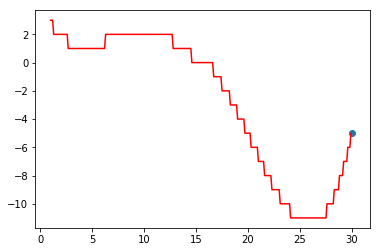

In [24]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import optimize

#f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

def func(x):
    return np.sin(x/5.)*np.exp(x/10.)+5*np.exp((-1)*x/2.)

#Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], 
#т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

def h(x):
    return np.int(func(x))

f2 = np.vectorize(h)

#Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. 

x0 = 30.
m = minimize(f2, x0, method='BFGS')
print(m)
x = np.arange(1., 30., 0.1)
plt.plot(x, f2(x), 'r')
plt.scatter(m.x, f2(m.x))
plt.show()

#Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид

In [25]:
f = open('answer.txt', 'w')
f.write(str(m.fun[0])+' ')
f.close()

In [26]:
#Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

bounds = [(1., 30.)]
m = optimize.differential_evolution(f2, bounds)
print(m.fun)
f = open('answer.txt', 'a')
f.write(str(m.fun))
f.close()

#Обратите внимание на то, что полученные ответы различаются. 
#Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) 
#и явно не пригоден для минимизации рассмотренной нами разрывной функции.

-11.0
